### Necessary libraries added.



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread # image read
from skimage.color import rgb2gray # simple function for converting rgb imge to gray
from skimage.filters import threshold_otsu # implemented otsu global thresholding function

img = imread("https://raw.githubusercontent.com/muthuspark/ml_research/master/resources/sudoku4.jpg") # image given is read

### Convert the image to grayscale.

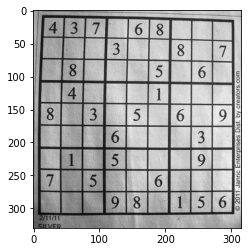

In [ ]:
# convert the image to grayscale
gray_img = rgb2gray(img)
gray_img*=255
gray_img = gray_img.astype(np.uint8)
#now our image is in [0-255] range
plt.imshow(gray_img, cmap="gray")

### Calculated histogram was shown.

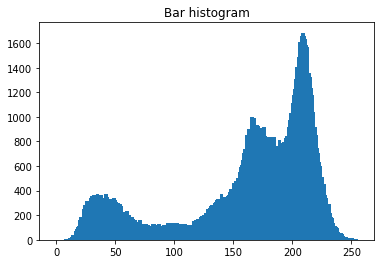

In [ ]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0,255])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 3)
plt.title("Bar histogram")
plt.show()

taking the average of gray image

In [ ]:
np.average(gray_img)

161.95426735711547

In [ ]:
G1 = [intensity_values[i]*hist[i] for i in range(len(intensity_values)) if i <= 20]
np.sum(G1) / np.sum(hist[:20])

22.35849

### Define basic global threshold function.

In [ ]:
def threshold_basic_global_impl(image):

   #validate grayscale
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("must be a grayscale image.")
        return

    #validate multicolored
    if np.min(image) == np.max(image):
        print("the image must have multiple colors")
        return

    T = np.average(image) # initial estimate and round it for int range value
    T_prev = 0 # previous T value is initially assign 0 that is assumption.
    G1 = [] # is the first array of group of pixels which is smaller than the threshold value
    G2 = [] # is the second array of group of pixels which is bigger than the threshold value

    while abs(T - T_prev) > 0.01:

      T_prev = T

      for i in image:
        for j in i:
          if(j <= T):
            G1.append(j) # append smaller values
          else:
            G2.append(j) # append bigger values

      M1 = np.mean(G1) # M1 represents G1 mean values
      M2 = np.mean(G2) # M2 represents G2 mean values

      print("M1: ", M1)
      print("M2: ", M2)

      T = (M1 + M2) / 2 # T new value

      print("T: ", T)
      print("-------")

    return T

**Second Impl**

In [ ]:
def threshold_basic_global_impl2(image):

   #validate grayscale
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("must be a grayscale image.")
        return

    #validate multicolored
    if np.min(image) == np.max(image):
        print("the image must have multiple colors")
        return

    T = np.average(image) # initial estimate and round it for int range value
    T_prev = 0 # previous T value is initially assign 0 that is assumption.
    G1 = [] # is the first array of group of pixels which is smaller than the threshold value
    G2 = [] # is the second array of group of pixels which is bigger than the threshold value

    while abs(T - T_prev) > 0.01:

      T_prev = T

      G1 = [intensity_values[i]*hist[i] for i in range(len(intensity_values)) if i <= T]
      G2 = [intensity_values[i]*hist[i] for i in range(len(intensity_values)) if i > T]

      M1 = np.sum(G1)/np.sum(hist[:round(T)]) # M1 represents G1 mean values
      M2 = np.sum(G2)/np.sum(hist[round(T):]) # M2 represents G2 mean values

      print("M1: ", M1)
      print("M2: ", M2)

      T = (M1 + M2) / 2 # T new value

      print("T: ", T)
      print("-------")

    return T

Finding the most suitable value for threshold by using basic global thresholding.

In [ ]:
threshold = threshold_basic_global_impl(gray_img)
threshold

M1:  95.5792770419426
M2:  197.30743680188124
T:  146.4433569219119
-------
M1:  87.96610169491525
M2:  194.89617418179046
T:  141.43113793835286
-------
M1:  83.85091342861561
M2:  193.76379429784708
T:  138.80735386323136
-------
M1:  81.07340725005614
M2:  193.0397425941045
T:  137.0565749220803
-------
M1:  79.16450121118696
M2:  192.573054076279
T:  135.86877764373298
-------
M1:  77.59677849259138
M2:  192.18766961498213
T:  134.89222405378675
-------
M1:  76.33700550031733
M2:  191.88421831090076
T:  134.11061190560906
-------
M1:  75.36103941205732
M2:  191.65920265053336
T:  133.51012103129534
-------
M1:  74.50664960448685
M2:  191.46087077959183
T:  132.98376019203934
-------
M1:  73.74608103486044
M2:  191.2832066813955
T:  132.51464385812798
-------
M1:  73.1111561608676
M2:  191.13881518525253
T:  132.12498567306005
-------
M1:  72.57311644114438
M2:  191.01914973604647
T:  131.7961330885954
-------
M1:  72.06039453442031
M2:  190.90221448994956
T:  131.48130451218492
---

126.34327739839797

In [ ]:
threshold2 = threshold_basic_global_impl2(gray_img)
threshold2

M1:  95.57928
M2:  197.30574
T:  146.4425048828125
-------
M1:  79.14196
M2:  191.8304
T:  135.48617553710938
-------
M1:  69.388176
M2:  189.6286
T:  129.50839233398438
-------
M1:  63.732426
M2:  189.15726
T:  126.44483947753906
-------
M1:  62.220825
M2:  188.19524
T:  125.2080307006836
-------
M1:  61.677742
M2:  188.02745
T:  124.85260009765625
-------
M1:  60.498608
M2:  188.33408
T:  124.41634368896484
-------
M1:  61.031784
M2:  187.90721
T:  124.46949768066406
-------
M1:  61.031784
M2:  187.90721
T:  124.46949768066406
-------


124.46949768066406

We can see the result from above function.
Threshold value is determined by the difference in T in successive iterations, say ∆T, is less than a predefined value (ε) that is 0.01.

***Also we see that implementation-1 is taking O(n^3) time and the result not converge very well, on the other hand the implementation-2 is taking less amount of time and it converges as good as otsu's implementation that we will see later.***

---
Converting the image values as binary represent which is [0,1]
```
gray_img > threshold

```

-> says that if gray_img value is bigger than threshold that assign True otherwise False.

In [ ]:
img_thresholded = gray_img > threshold
img_thresholded2 = gray_img > threshold2

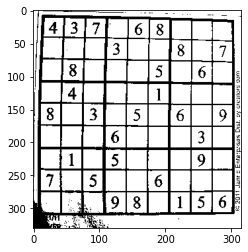

In [ ]:
plt.imshow(img_thresholded, cmap = 'gray')

In [ ]:
threshold_otsu_impl = threshold_otsu(gray_img)
threshold_otsu_impl

124

We can see the result from above function. Threshold value is determined by the otsu's method and that is 124.

In [ ]:
img_thresholded_otsu = gray_img > threshold_otsu_impl

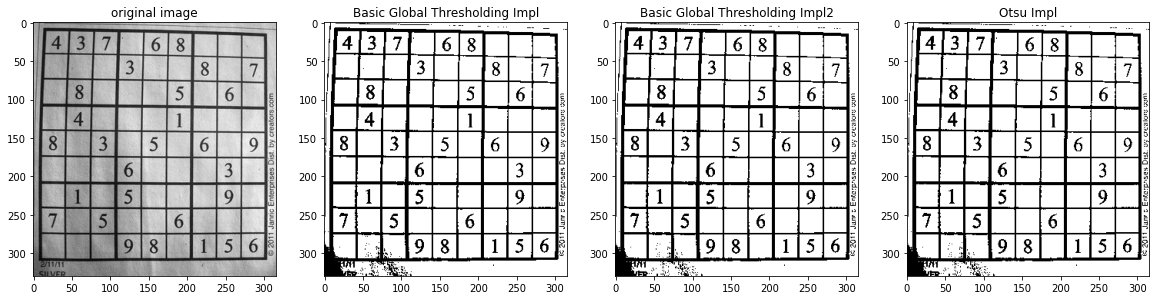

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
ax[0].set_title("original image")
ax[0].imshow(gray_img, cmap="gray")

ax[1].set_title("Basic Global Thresholding Impl")
ax[1].imshow(img_thresholded, cmap="gray")

ax[2].set_title("Basic Global Thresholding Impl2")
ax[2].imshow(img_thresholded2, cmap="gray")

ax[3].set_title("Otsu Impl")
ax[3].imshow(img_thresholded_otsu, cmap="gray")

#### Conclusion

Basic global thresholding implementation by custom made is worked as good as otsu's implementation.